Step 1: Create three clusters of data: {xi^j}(i=1;1000) iid N(uj,sigj)(j=1,2,3)

Color 
j = 1; Red; 
J = 2; Green;
j = 3; Blue;

u1 = [1 0]
u2 = [-1 0]
u3 = [0 =10]

sig1 = u(lam1)u.t
sig2 = u(lam2)u.t
sig3 = I

u = [[1/sqrt(2) -1/sqrt(2)] [1/sqrt(2) 1/sqrt(2)]]
lam1 = [[4 0][0 1]]
lam2 = [[1 0][0 5]]

In [170]:
import numpy as np
u1 = [1,0]
u2 = [-1,0]
u3 = [0,-10]

u = np.matrix([[1/np.sqrt(2),-1/np.sqrt(2)],[1/np.sqrt(2),1/np.sqrt(2)]])
lam1 = np.matrix([[4,0],[0,1]])
lam2 = np.matrix([[1,0],[0,5]])


[[ 1.01360675  2.15315478]
 [ 2.36794274  3.34611408]
 [-0.47784012  0.64852498]
 ...
 [ 0.6883794   0.89831195]
 [ 1.88850721 -0.10399891]
 [ 2.15044973  0.28736936]]


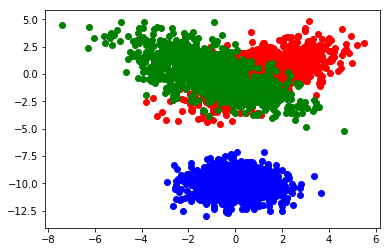

In [171]:
import matplotlib.pyplot as plt
import scipy.stats 
training_data1 = scipy.stats.multivariate_normal(u1,u@(lam1)@u.T).rvs(1000)
training_data2 = scipy.stats.multivariate_normal(u2,u@(lam2)@u.T).rvs(1000)
training_data3 = scipy.stats.multivariate_normal(u3,np.identity(2)).rvs(1000)
print(training_data1)
plt.scatter(training_data1[:,0], training_data1[:,1], c='red')
plt.scatter(training_data2[:,0], training_data2[:,1], c='green')
plt.scatter(training_data3[:,0], training_data3[:,1], c='blue')

K-Means Clustering

In [172]:
import random
print(training_data1.shape)
print(training_data2.shape)
print(training_data3.shape)
training_data = np.concatenate((training_data1,training_data2,training_data3))
print(training_data.shape)
random.shuffle(training_data)
print(training_data.shape)
cluster = np.zeros((3000))
cluster[0:1000] = 0
cluster[1000:2000] = 1
cluster[2000:3000] = 2

(1000, 2)
(1000, 2)
(1000, 2)
(3000, 2)
(3000, 2)


In [173]:
xmean0 = np.mean(training_data[0:1000,0])
xmean0
ymean0 = np.mean(training_data[0:1000,1])
xmean1 = np.mean(training_data[1000:2000,0])
ymean1 = np.mean(training_data[1000:2000,1])
print(ymean1)
xmean2 = np.mean(training_data[2000:3000,0])
ymean2 = np.mean(training_data[2000:3000,1])
print(training_data.size)
xarr = [0,1,2]

0.031731913400944584
6000


In [174]:
w = np.zeros((3));
newcluster = np.zeros(3000)
x = 0;
while(not (np.array_equal(cluster,newcluster))):
    cluster = newcluster;
    xu = 0
    yu = 0
    zu = 0
    xmean00 = 0
    ymean00 = 0
    xmean11 = 0
    ymean11 = 0
    xmean22 = 0
    ymean22 = 0
    
    for j in range(3000):
        w[0] = np.sqrt((xmean0 - training_data[j][0])**2 + (ymean0 - training_data[j][1])**2)
        w[1] = np.sqrt((xmean1 - training_data[j][0])**2 + (ymean1 - training_data[j][1])**2)
        w[2] = np.sqrt((xmean2 - training_data[j][0])**2 + (ymean2 - training_data[j][1])**2)
        #print(np.argmin(w))
        newcluster[j] = xarr[np.argmin(w)]
    
    for k in range(3000):
        if(newcluster[q]==0):
            xmean00 = training_data[k][0]
            ymean00 = training_data[k][1]
            xu = xu + 1
        if(newcluster[q]==1):
            xmean11 = training_data[k][0]
            ymean11 = training_data[k][1]
            yu = yu + 1
        if(newcluster[q]==2):
            xmean22 = training_data[k][0]
            ymean22 = training_data[k][1]
            zu = zu + 1
    if(xu != 0):
        xmean0 = xmean00/xu
        ymean0 = ymean00/xu
    if(yu != 0):
        xmean1 = xmean11/yu
        ymean1 = ymean11/yu
    if(zu != 0):
        xmean2 = xmean22/zu
        ymean2 = ymean22/zu
    
# newcluster = np.around(newcluster,decimals = 1)



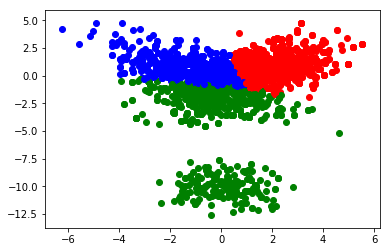

In [175]:
from matplotlib import pyplot as plt
for q in range (3000): 
        if (newcluster[q]==0):
            plt.scatter(training_data[q,0],training_data[q,1],color= 'red')
        if (newcluster[q]==1):
            plt.scatter(training_data[q,0],training_data[q,1],color= 'blue')
        if (newcluster[q]==2):
            plt.scatter(training_data[q,0],training_data[q,1],color= 'green')